In [56]:
import requests
import json
import base64
import io
from PIL import Image
from IPython.display import Markdown as md

base_url = "http://127.0.0.1:8080/api/"
text_gen_config = {
    "temperature": 0,
    "n": 1,
    "model": "gpt-3.5-turbo-0301",
    "max_tokens": None,
    "provider": "openai"
}


def req(uri, data, file=None):
    # print(f"############ {uri} ##############")
    response = requests.post(
        url=base_url + uri,
        data=json.dumps(data) if file is None else {"data": json.dumps(data)},
        files=None if file is None else {"file": file},
        headers=None if file else {"Content-Type": "application/json"}
    )
    # print(response.text)
    return json.loads(response.text)


def parse_goal(goals):
    return [str(p["index"]) + ". " + p["question"] for p in goals]


In [23]:
summary = req(uri="summarize", data={
    "description": "",
    "fields": {}
}, file=open("times.csv"))["summary"]


In [30]:
goals = req(
    uri="goal",
    data={
        "extra_hint_interest": "",
        "summary": summary,
        "n": 20,
        "textgen_config": text_gen_config
    }
)["data"]

In [28]:
parse_goal(goals)

['0. What is the distribution of x1?',
 '1. What is the correlation between x1 and x2?',
 '2. What is the distribution of x2?',
 '3. What is the correlation between x2 and x3?',
 '4. What is the distribution of x3?',
 '5. What is the correlation between x3 and x4?',
 '6. What is the distribution of x4?',
 '7. What is the distribution of id?',
 '8. What is the relationship between x1 and id?',
 '9. What is the relationship between x2 and id?',
 '10. What is the relationship between x3 and id?',
 '11. What is the relationship between x4 and id?',
 '12. What is the distribution of x1 by id?',
 '13. What is the distribution of x2 by id?',
 '14. What is the distribution of x3 by id?',
 '15. What is the distribution of x4 by id?',
 '16. What is the distribution of x1, x2, x3, and x4?',
 '17. What is the correlation matrix between x1, x2, x3, and x4?',
 '18. What is the distribution of x1, x2, x3, and x4 by id?',
 '19. What is the relationship between x1 and x2, x3, and x4?']

In [31]:
goal = goals[1]
visu = req(
    uri="visualize",
    data={
        "summary": summary,
        "goal": goal,
        "library": "seaborn",
        "textgen_config": text_gen_config
    }
)

{'status': True,
 'charts': [{'spec': None,
   'status': True,
   'raster': 'iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAB/NUlEQVR4nO3deXhTVf4/8PdNmqRLuqcLZWkLLVD2Cm60FBWUEXUEEbXOKIjLDIIOgqPgCuOCOA46IMroT4TvqKio4DbjqIjs4gIISKUL0AKF0pZuadqkzT2/P7ChadKNJs1N8n49D89Mz71Jzuk7iZ/ee8+5khBCgIiIiIj8hsrTHSAiIiKi7sUCkIiIiMjPsAAkIiIi8jMsAImIiIj8DAtAIiIiIj/DApCIiIjIz7AAJCIiIvIzLACJiIiI/AwLQCIiIiI/wwKQiIiIyM+wACQiIiLyMywAiYiIiPwMC0AiIiIiP8MCkIiIiMjPsAAkIiIi8jMsAImIiIj8DAtAIiIiIj/DApCIiIjIz7AAJCIiIvIzLACJiIiI/AwLQCIiIiI/wwKQiIiIyM+wACQiIiLyMywAiYiIiPwMC0AiIiIiP8MCkIiIiMjPsAAkIiIi8jMsAImIiIj8DAtAIiIiIj/DApCIiIjIz7AAJCIiIvIzLACJiIiI/AwLQCIiIiI/wwKQiIiIyM+wACRFkSQJs2fP9tjrL1y4EJIkdctrlJWVufV1vMlll12Gyy67zKXP2R1ZOnP06FFIkoQXXnih21+blGP69OlISkrydDeIWsUCkFzi/fffhyRJWL9+vcO24cOHQ5IkbNq0yWFbnz59MHr0aLf16+DBg1i4cCGOHj3qttdozbPPPosNGzZ0++v6E5PJhIULF+Lbb7/1dFfcypPvY6V577338Mc//hGpqamQJMnlfzg

In [33]:
visu["charts"][0]["code"]

"import seaborn as sns\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\ndef plot(data: pd.DataFrame):\n    # solution plan\n    # i. Create a scatter plot of x1 and x2\n    sns.scatterplot(x='x1', y='x2', data=data)\n    plt.title('What is the correlation between x1 and x2?', wrap=True)\n    return plt;\n\nchart = plot(data)"

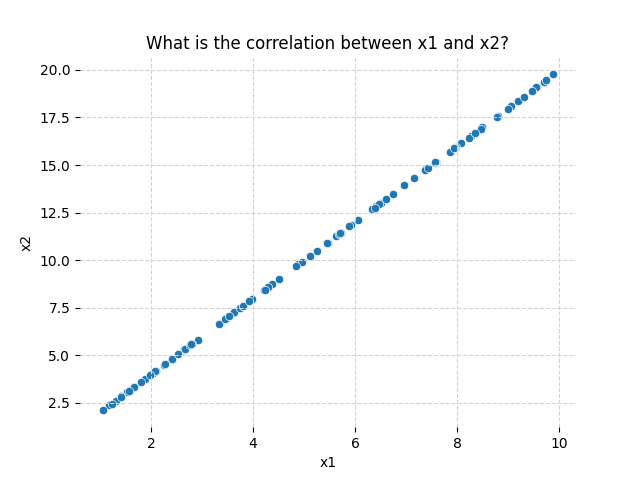

In [40]:
base64_data = visu["charts"][0]["raster"]
img = Image.open(io.BytesIO(base64.b64decode(base64_data)))
img

In [41]:
img.close()

In [48]:
conclusion = req(
    uri="visualize/conclusion",
    data={
        "summary": summary,
        "goal": goal,
        "textgen_config": {
            "temperature": 0,
            "n": 1,
            "model": "gpt-4-turbo",
            "max_tokens": None,
            "provider": "openai"
        },
        "library": "seaborn",
        "code": visu["charts"][0]["code"]
    }
)

In [57]:
md(conclusion["charts"][0]["content"])

### Analysis of the Correlation between x1 and x2

The scatter plot provided illustrates a clear relationship between variables x1 and x2. Observing the distribution of data points, there is a distinct linear pattern where x2 increases as x1 increases. This pattern suggests a strong positive correlation between the two variables. The data points are closely aligned along a line that slopes upwards from left to right, indicating that as the value of x1 increases, the value of x2 consistently increases as well.

### Implications and Insights

The strong positive correlation between x1 and x2 can have various implications depending on the context of these variables. If x1 and x2 represent factors within an economic, social, or environmental framework, this correlation can be indicative of underlying trends or causal relationships.

1. **Economic Implications**: If x1 and x2 are economic indicators, such as income level (x1) and spending (x2), the graph suggests that higher income levels are associated with higher spending. This could imply a robust consumer confidence and a healthy economy. However, it also highlights the dependency of market stability on the financial well-being of the consumers, suggesting that any significant economic downturn affecting incomes could lead to a sharp decrease in spending, potentially destabilizing markets.

2. **Social Implications**: In a social context, if x1 represents educational attainment and x2 represents employment rate, the correlation might suggest that higher education levels lead to better employment opportunities. This can be a critical insight for policymakers focusing on education reforms to boost employment rates. However, it also raises concerns about the accessibility and equality of educational opportunities, as those without access to higher education might find themselves significantly disadvantaged in the job market.

3. **Environmental Implications**: If x1 represents the amount of renewable energy produced and x2 represents the reduction in carbon emissions, the positive correlation could indicate that increased production of renewable energy leads to significant decreases in carbon emissions. This would be a strong argument for increased investment in renewable energy technologies.

### Solutions and Recommendations

Given the implications of the correlation, several strategies can be recommended to manage or enhance the effects:

- **Economic Stability**: Diversify economic policies to not only boost income but also create safety nets that protect against market volatility. Encourage savings and investments to ensure that spending power does not collapse with income shocks.

- **Education and Employment**: Increase accessibility to education through scholarships, online learning platforms, and vocational training programs to ensure that higher education levels and subsequent employment benefits are available to a broader population.

- **Environmental Sustainability**: Governments and corporations should invest more in renewable energy projects and technologies. Public awareness campaigns and incentives could be used to accelerate the adoption of green technologies and practices.

In conclusion, understanding the correlation between x1 and x2 provides valuable insights that can guide strategic decisions in various domains. By addressing the potential issues linked with this correlation and implementing targeted solutions, it is possible to enhance positive outcomes and mitigate any negative impacts.